In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [11]:
#importing the weather dataframe
path = r'C:\Users\karim\Documents\machine learning'
df_weather1 = pd.read_csv(os.path.join(path, 'data', 'original Data', 'Dataset-weather-prediction-dataset-processed.csv'))

In [9]:
df_weather1.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [13]:
df_answers1 = pd.read_csv(os.path.join(path, 'data', 'original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [15]:
df_answers1

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
#drop roma,tours and Gdansk observations
df_weather2= df_weather1.drop([
    'GDANSK_cloud_cover',
    'GDANSK_humidity',
    'GDANSK_precipitation',
    'GDANSK_snow_depth',
    'GDANSK_temp_mean',
    'GDANSK_temp_min',
    'GDANSK_temp_max',
     'TOURS_wind_speed',
    'TOURS_humidity',
    'TOURS_pressure',
    'TOURS_global_radiation',
    'TOURS_precipitation', 
    'TOURS_temp_mean',
    'TOURS_temp_min', 
    'TOURS_temp_max',
    'ROMA_cloud_cover',
    'ROMA_wind_speed',
    'ROMA_humidity',
    'ROMA_pressure',
    'ROMA_sunshine',
    'ROMA_temp_mean'
], axis=1)

In [19]:
#dropping unneeded columns.
X = df_weather2.drop(['DATE', 'MONTH'], axis=1)
y = df_answers1.drop(['DATE'], axis=1)

In [21]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[-1.41107749 -0.03095027 -0.61660315 ...  1.45475014  1.57581674
   1.16512065]
 [ 1.08186228 -0.58789342  0.55778807 ... -0.0139084  -0.0077553
  -0.00981651]
 [ 0.66637232 -0.866365    0.73846364 ... -2.92125284 -3.22950531
  -2.18774879]
 ...
 [ 1.08186228 -0.03095027  1.64184151 ... -0.07385364  0.48369809
  -0.61161358]
 [ 0.66637232 -0.03095027  0.64812586 ...  0.55557144  0.42909216
   0.64929458]
 [-1.41107749 -1.14483657 -1.33930544 ... -0.0139084  -0.0077553
  -0.00981651]]


In [25]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df= pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

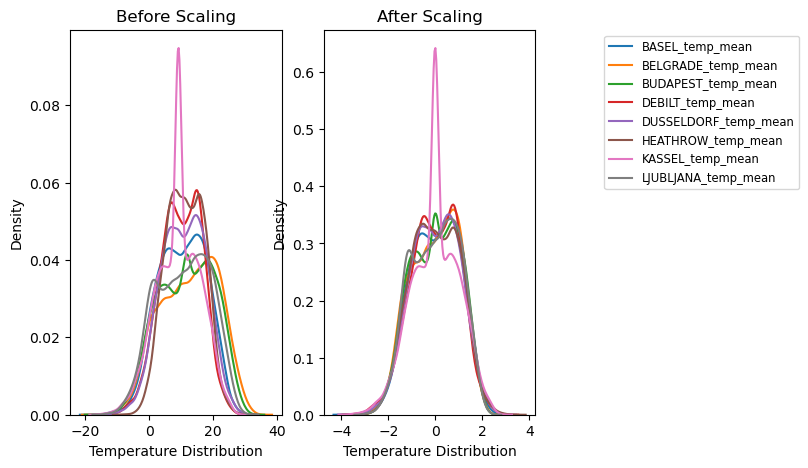

In [69]:
#Show scaling differences 
## Sample a few columns ending with 'temp_mean'
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
# Select columns ending with 'length'
temp_cols = X_train.columns[X_train.columns.str.endswith('temp_mean')]
for col in temp_cols[:8]:  # limit to 8 columns for readability
    sns.kdeplot(X_train[col], ax=ax1, label=col)
ax1.legend(loc='upper left', bbox_to_anchor=(2.5, 1), fontsize='small')
ax1.set_xlabel('Temperature Distribution')

ax2.set_title('After Scaling')
temp_cols = X_train_df.columns[X_train_df.columns.str.endswith('temp_mean')]
for col in temp_cols[:8]:  # limit to 8 columns for readability
    sns.kdeplot(X_train_df[col], ax=ax2, label=col)
    ax2.set_xlabel('Temperature Distribution')

plt.show()

In [71]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. 
#model1 two hidden layers with 5 nodes each ,Interation up to 500 and the telerance is 0.0001

mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

,hidden_layer_sizes,"(5, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,None


In [75]:
y_pred = mlp.predict(X_train)
print("Training Accuracy:",accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print("Test Accuracy:", accuracy_score(y_pred_test, y_test))

Training Accuracy: 0.45235881942830586
Test Accuracy: 0.4553851516207738


In [109]:
#Create the ANN
#model 2
# (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes, interation up to 2000 and a tolerance of 0.0001.
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=2000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

,hidden_layer_sizes,"(100, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,2000
,shuffle,True
,random_state,None


In [115]:
y_pred = mlp.predict(X_train)
print("Training Accuracy:",accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print("Test Accuracy:", accuracy_score(y_pred_test, y_test))

Training Accuracy: 0.7447129909365559
Test Accuracy: 0.5493203206692228


In [127]:
#Create the ANN
#model 3
# (200, 100, 100) is three hidden layers with 200, 100, and 100 nodes, interation up to 5000 and a tolerance of 0.0000001.
mlp = MLPClassifier(hidden_layer_sizes=(200, 100, 50), max_iter=5000, tol=0.0000001)
#Fit the data to the model
mlp.fit(X_train, y_train)

,hidden_layer_sizes,"(200, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,5000
,shuffle,True
,random_state,None


In [129]:
y_pred = mlp.predict(X_train)
print("Training Accuracy:",accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print("Test Accuracy:", accuracy_score(y_pred_test, y_test))

Training Accuracy: 0.7415175458982105
Test Accuracy: 0.5730219588706866


C:\Users\karim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


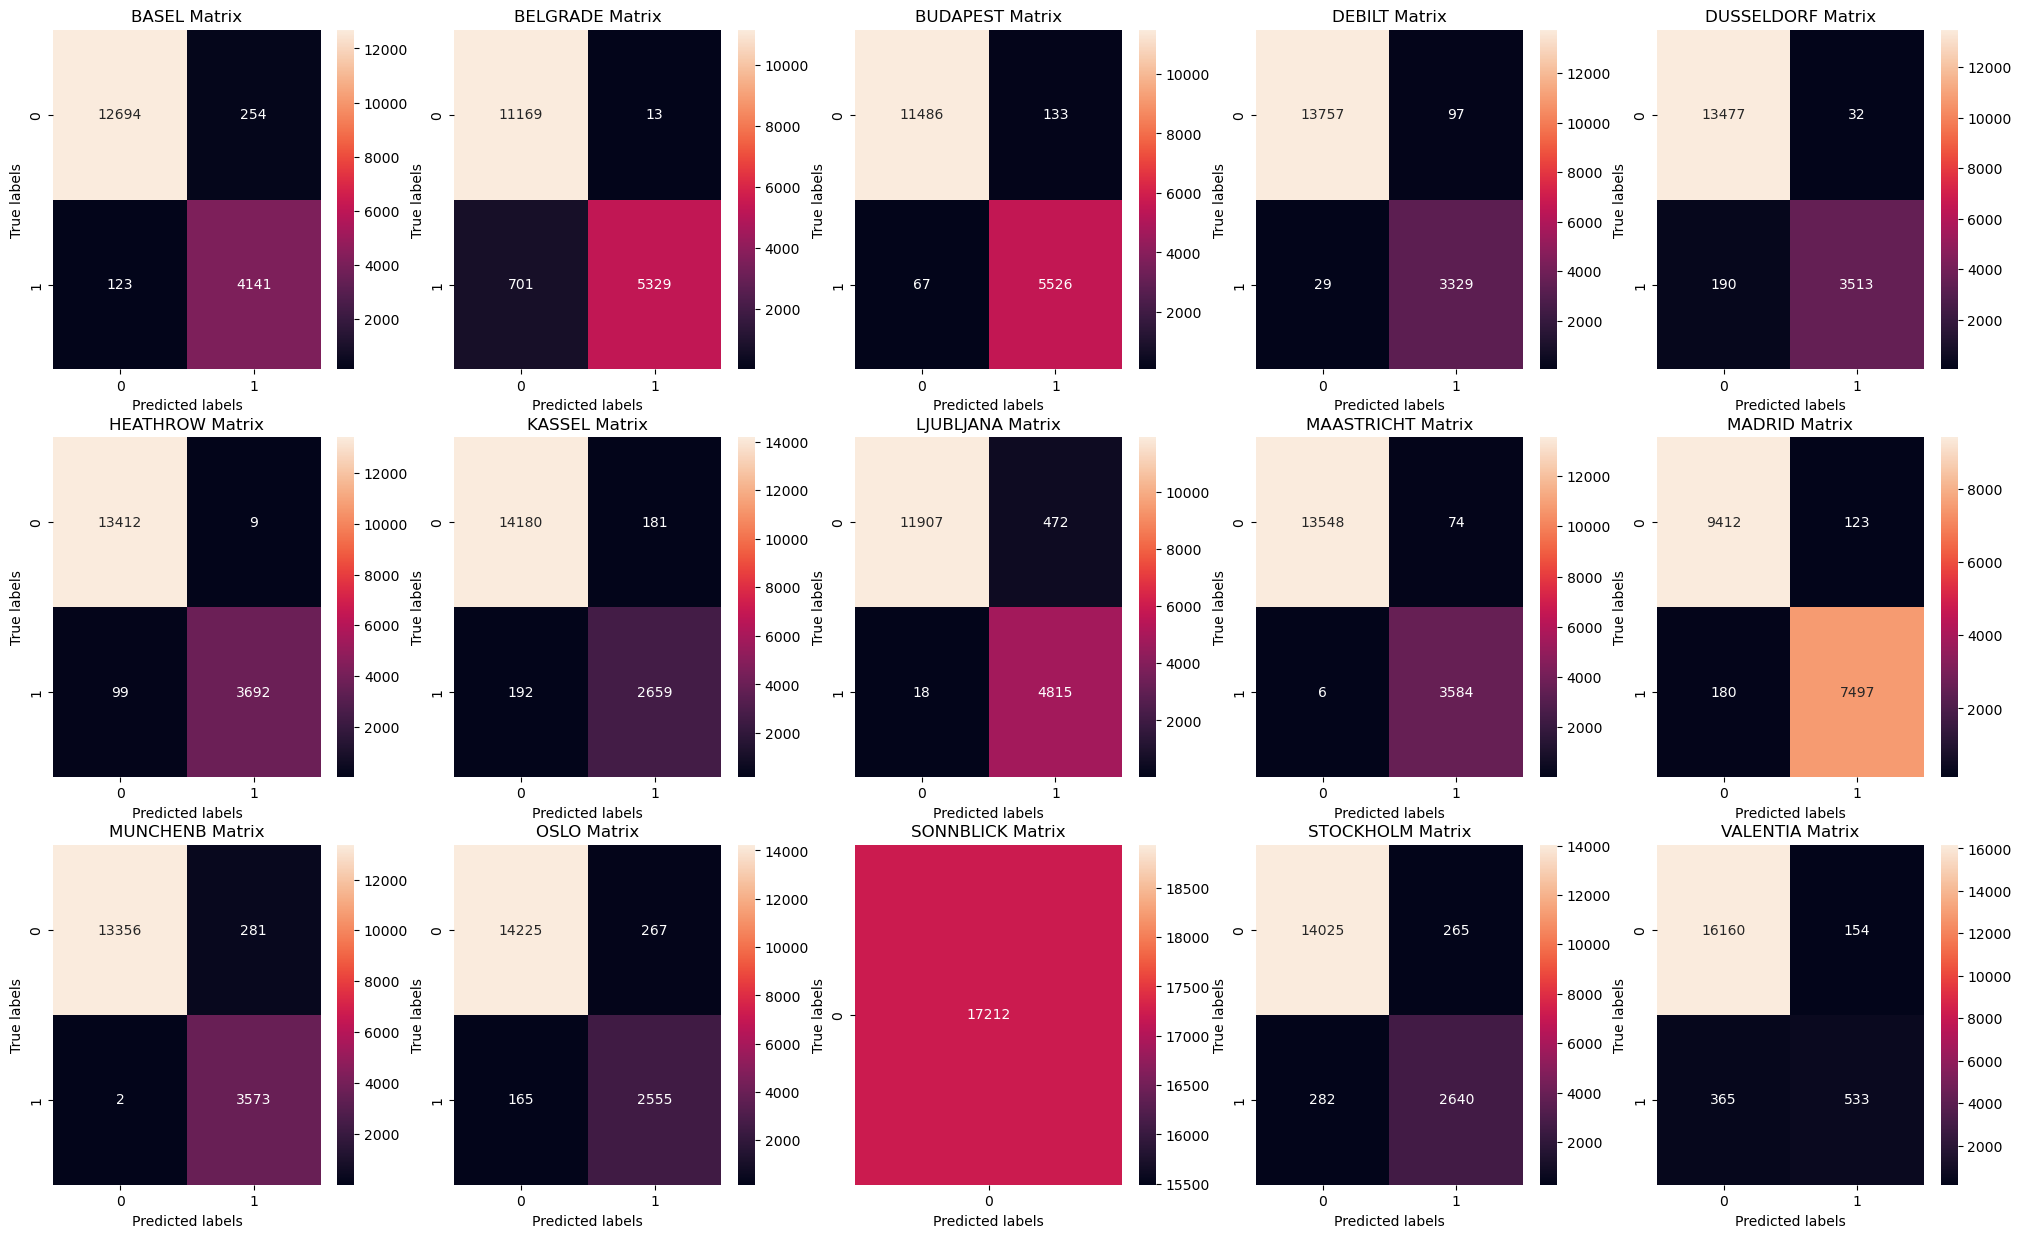

In [241]:
#Confusion matrix based on the last "k" in the sequence (Training data)
locations = list({x.split("_")[0] for x in df_answers1.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

C:\Users\karim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


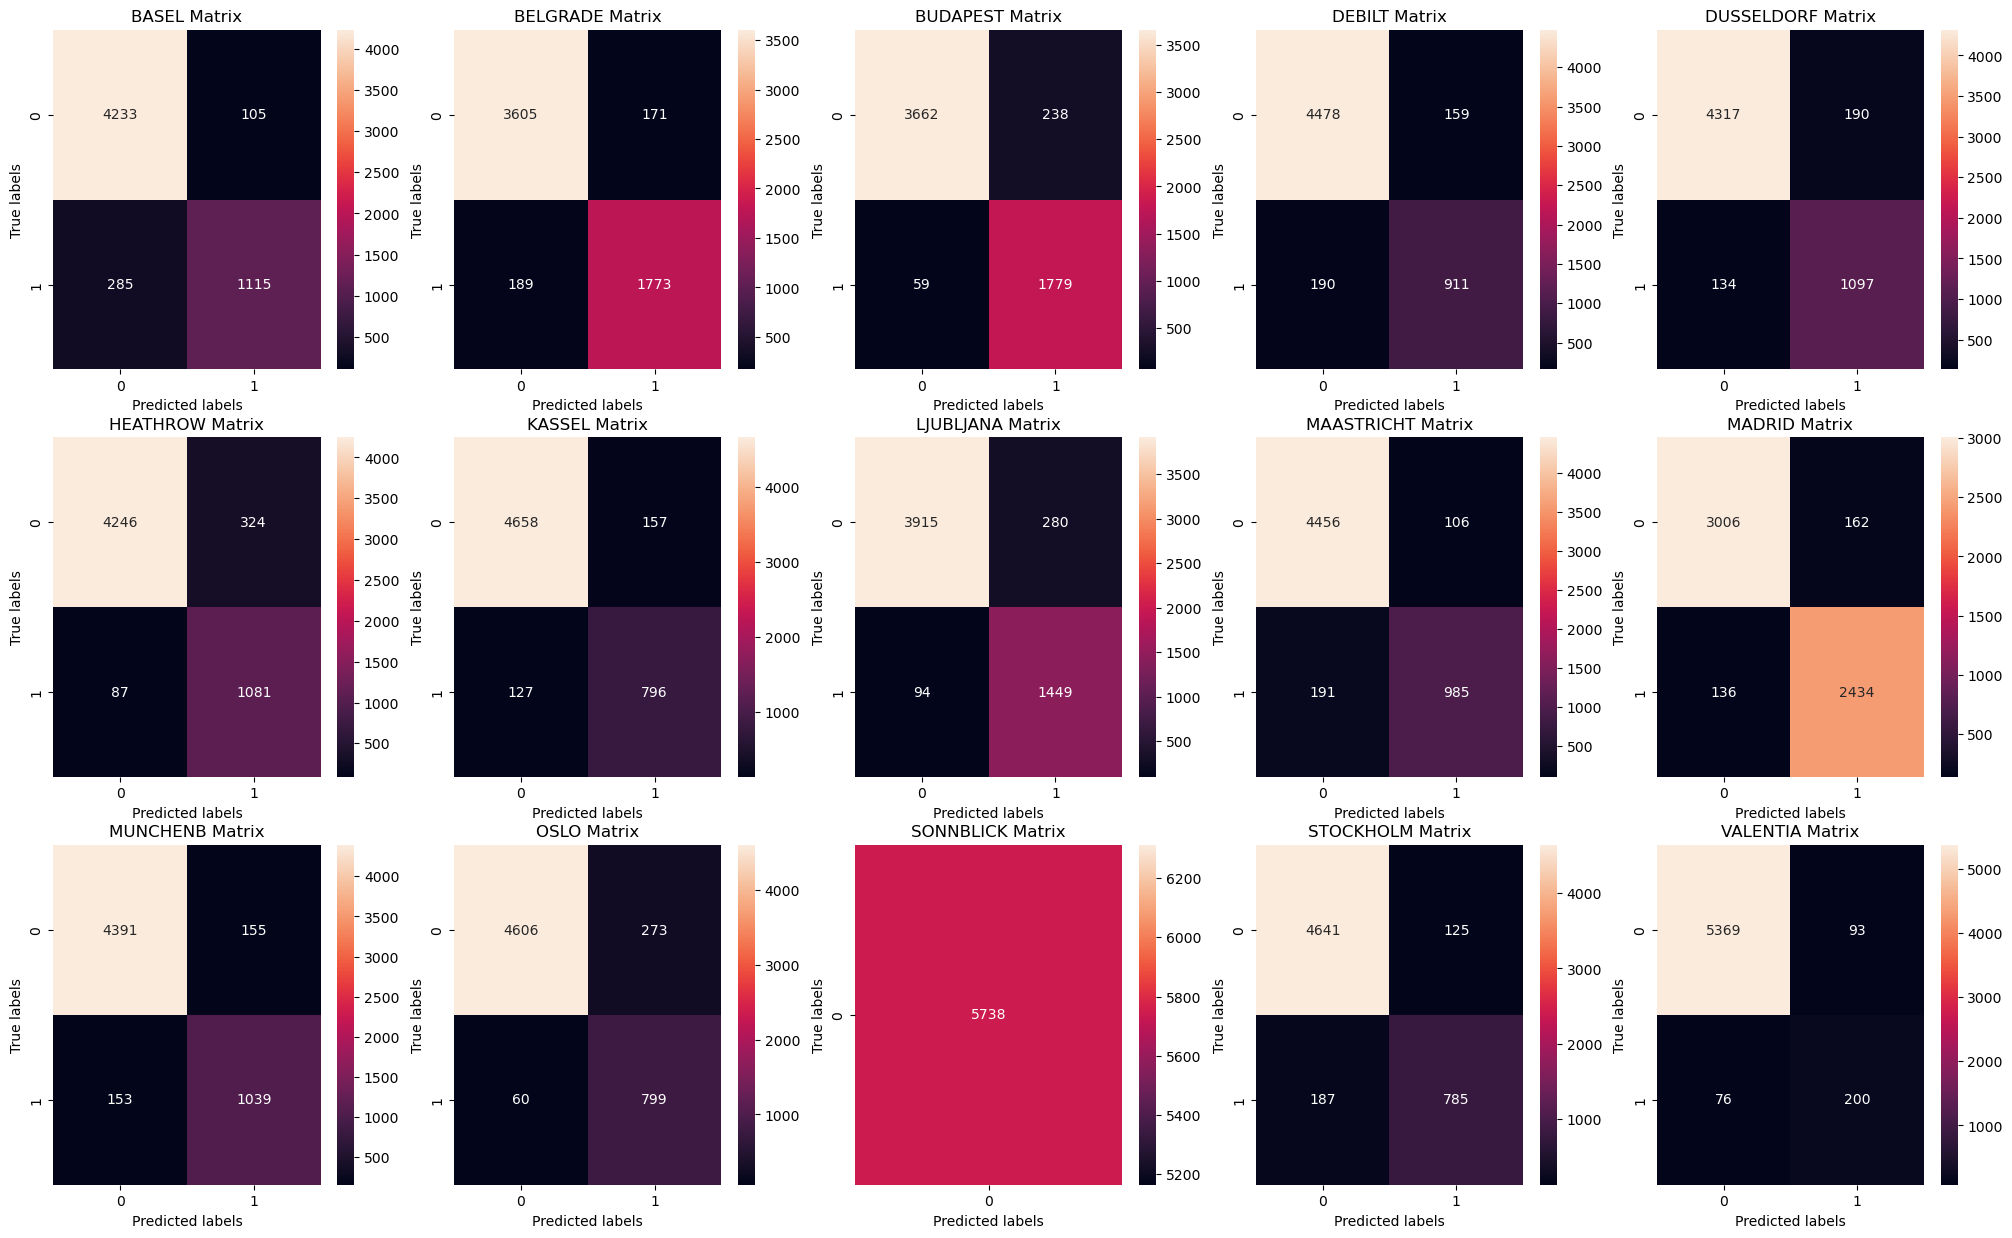

In [239]:
locations = list({x.split("_")[0] for x in df_answers1.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1